In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (40,20)

In [2]:
tv18 = pd.read_csv('Quote-Equity-TV18BRDCST-EQ-14-10-2020-to-14-10-2021.csv')
net18 = pd.read_csv('Quote-Equity-NETWORK18-EQ-14-10-2020-to-14-10-2021.csv')

In [3]:
tv18.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [4]:
tv18['Date '] = pd.to_datetime(tv18['Date '], infer_datetime_format=True)
net18['Date '] = pd.to_datetime(net18['Date '], infer_datetime_format=True)

In [5]:
tv18.sort_values(by = ['Date '], ascending = True)
net18.sort_values(by = ['Date '], ascending = True)
tv18.reset_index(drop=True, inplace =True)
net18.reset_index(drop=True, inplace =True)

In [6]:
tv18.corr()

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,No of trades
OPEN,1.000000,0.984958,0.993212,0.998015,0.977263,0.978138,0.987750,0.792254,0.839275,0.301992,0.418703
HIGH,0.984958,1.000000,0.986100,0.984151,0.993764,0.994337,0.998058,0.779569,0.832249,0.428442,0.534041
LOW,0.993212,0.986100,1.000000,0.992726,0.986942,0.987602,0.993175,0.805127,0.852302,0.301815,0.415592
PREV. CLOSE,0.998015,0.984151,0.992726,1.000000,0.977067,0.977960,0.987444,0.796800,0.843282,0.292366,0.409141
ltp,0.977263,0.993764,0.986942,0.977067,1.000000,0.999698,0.996201,0.788132,0.840280,0.404575,0.507002
close,0.978138,0.994337,0.987602,0.977960,0.999698,1.000000,0.996772,0.789209,0.841282,0.404643,0.507603
vwap,0.987750,0.998058,0.993175,0.987444,0.996201,0.996772,1.000000,0.789661,0.840877,0.394163,0.501365
52W H,0.792254,0.779569,0.805127,0.796800,0.788132,0.789209,0.789661,1.000000,0.951888,0.089620,0.202243
52W L,0.839275,0.832249,0.852302,0.843282,0.840280,0.841282,0.840877,0.951888,1.000000,0.146165,0.271075
VOLUME,0.301992,0.428442,0.301815,0.292366,0.404575,0.404643,0.394163,0.089620,0.146165,1.000000,0.968894


In [7]:
net18.corr()

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,No of trades
OPEN,1.000000,0.984025,0.993992,0.997838,0.977453,0.977298,0.987587,0.922866,0.892840,0.301103,0.449972
HIGH,0.984025,1.000000,0.985524,0.983732,0.995319,0.995635,0.998211,0.933096,0.878440,0.419594,0.561251
LOW,0.993992,0.985524,1.000000,0.994206,0.984958,0.984703,0.992045,0.930542,0.901744,0.290511,0.438505
PREV. CLOSE,0.997838,0.983732,0.994206,1.000000,0.978419,0.978247,0.987987,0.925488,0.897150,0.285950,0.435721
ltp,0.977453,0.995319,0.984958,0.978419,1.000000,0.999755,0.996780,0.937314,0.882637,0.408112,0.547678
close,0.977298,0.995635,0.984703,0.978247,0.999755,1.000000,0.996892,0.937518,0.882741,0.408952,0.548958
vwap,0.987587,0.998211,0.992045,0.987987,0.996780,0.996892,1.000000,0.934819,0.889341,0.387796,0.530807
52W H,0.922866,0.933096,0.930542,0.925488,0.937314,0.937518,0.934819,1.000000,0.841198,0.279632,0.445367
52W L,0.892840,0.878440,0.901744,0.897150,0.882637,0.882741,0.889341,0.841198,1.000000,0.169754,0.313902
VOLUME,0.301103,0.419594,0.290511,0.285950,0.408112,0.408952,0.387796,0.279632,0.169754,1.000000,0.966235


In [8]:
tv18.corrwith(net18)

OPEN             0.840807
HIGH             0.832610
LOW              0.839403
PREV. CLOSE      0.840253
ltp              0.831990
close            0.834741
vwap             0.836324
52W H            0.876137
52W L            0.997790
VOLUME           0.733216
No of trades     0.697036
dtype: float64

In [9]:
joint = pd.merge(tv18, net18, how = 'inner', on = ['Date '], suffixes=('_tv18', '_net18'))

In [10]:
joint.columns

Index(['Date ', 'series _tv18', 'OPEN _tv18', 'HIGH _tv18', 'LOW _tv18',
       'PREV. CLOSE _tv18', 'ltp _tv18', 'close _tv18', 'vwap _tv18',
       '52W H _tv18', '52W L _tv18', 'VOLUME _tv18', 'VALUE _tv18',
       'No of trades _tv18', 'series _net18', 'OPEN _net18', 'HIGH _net18',
       'LOW _net18', 'PREV. CLOSE _net18', 'ltp _net18', 'close _net18',
       'vwap _net18', '52W H _net18', '52W L _net18', 'VOLUME _net18',
       'VALUE _net18', 'No of trades _net18'],
      dtype='object')

In [11]:
joint = joint.drop(['Date ', 'series _tv18', 'series _net18'], axis=1)

joint.replace(',','', regex=True, inplace=True)

#joint_cols = list(set(joint.columns))

#joint = scaler.fit_transform(joint)




In [12]:
print(joint.shape)


(250, 24)


In [13]:
joint['return_tv18'] = (joint['close _tv18'] - joint['close _tv18'][len(joint)-1])/joint['close _tv18'][len(joint)-1]*100

joint['return_net18'] = (joint['close _net18'] - joint['close _net18'][len(joint)-1])/joint['close _net18'][len(joint)-1]*100

In [14]:
joint

,OPEN _tv18,HIGH _tv18,LOW _tv18,PREV. CLOSE _tv18,ltp _tv18,close _tv18,vwap _tv18,52W H _tv18,52W L _tv18,VOLUME _tv18,...,ltp _net18,close _net18,vwap _net18,52W H _net18,52W L _net18,VOLUME _net18,VALUE _net18,No of trades _net18,return_tv18,return_net18
0,44.30,46.40,43.10,43.85,45.15,45.65,44.93,48.95,26.25,21452930,...,78.05,78.75,75.96,81.00,32.25,11727216,890821182.20,34483,54.222973,130.938416
1,46.80,46.90,43.60,46.40,44.10,43.85,45.05,48.95,26.25,11900767,...,69.20,68.95,70.28,74.00,32.25,8609954,605131600.15,28209,48.141892,102.199413
2,42.80,47.40,42.70,43.00,46.40,46.40,45.98,48.95,26.25,51163755,...,73.25,73.25,70.47,73.25,32.25,25292531,1782443697.85,60807,56.756757,114.809384
3,43.40,43.60,42.65,43.10,43.00,43.00,43.17,48.95,26.25,4551678,...,61.25,61.05,61.10,63.50,32.25,960729,58701893.05,4462,45.270270,79.032258
4,43.80,43.80,42.75,43.50,43.15,43.10,43.15,48.95,26.25,5725341,...,61.05,61.20,61.68,63.50,32.25,1473476,90880460.40,6570,45.608108,79.472141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,27.80,28.60,27.75,27.85,27.85,27.80,28.10,41.70,11.90,2607198,...,32.85,32.80,32.89,50.00,14.70,284902,9370293.60,907,-6.081081,-3.812317
246,28.55,29.05,27.70,28.55,27.80,27.85,28.30,41.70,11.90,4175863,...,32.85,32.80,33.13,50.00,14.70,493256,16340581.10,1500,-5.912162,-3.812317
247,28.85,29.30,28.25,28.85,28.75,28.55,28.67,41.70,11.90,3696340,...,33.45,33.10,33.22,50.00,14.70,450494,14967636.10,1653,-3.547297,-2.932551
248,29.65,29.85,28.75,29.60,28.90,28.85,29.15,41.70,11.90,1991430,...,33.35,33.35,33.62,50.00,14.70,447171,15033933.70,1582,-2.533784,-2.199413


In [15]:
joint['return_diff'] = joint['return_net18'] - joint['return_tv18']
joint['return_diff']


0      76.715443
1      54.057522
2      58.052627
3      33.761988
4      33.864033
         ...    
245     2.268764
246     2.099845
247     0.614746
248     0.334370
249     0.000000
Name: return_diff, Length: 250, dtype: float64

In [16]:
joint['avg_net18_tv18'] = (joint['return_net18']+joint['return_tv18'])/2

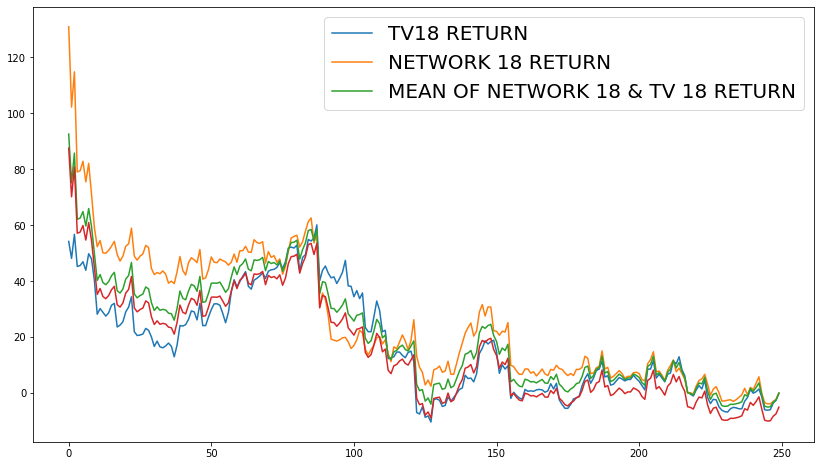

In [17]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(joint['return_tv18'], label = 'TV18 RETURN')

ax.plot(joint['return_net18'], label = 'NETWORK 18 RETURN')
ax.plot(joint['avg_net18_tv18'], label = 'MEAN OF NETWORK 18 & TV 18 RETURN')
ax.plot(joint['avg_net18_tv18']-5)
ax.legend(fontsize = 20)


In [49]:
def buysell(joint):
    buy_1 = []
    sell_1 = []
    buy_2 = []
    sell_2 = []
    position = False
    for i in range(len(joint)):
        if (joint['avg_net18_tv18'][i] - joint['return_tv18'][i] >= 2.5) and (joint['avg_net18_tv18'][i] - joint['return_net18'][i] <= -2.5) :
            if position == False:
                buy_1.append(joint['close _tv18'][i])
                sell_2.append(joint['close _net18'][i])
                buy_2.append(np.nan)
                sell_1.append(np.nan)
                position = True
                
            else:
                buy_1.append(np.nan)
                sell_2.append(np.nan)
                buy_2.append(np.nan)
                sell_1.append(np.nan)
        
        elif (joint['avg_net18_tv18'][i] - joint['return_tv18'][i] < 2.5) and (joint['avg_net18_tv18'][i] - joint['return_net18'][i] > -2.5) :
           
            if position == True:
                buy_2.append(joint['close _net18'][i])
                sell_1.append(joint['close _tv18'][i])
                buy_1.append(np.nan)
                sell_2.append(np.nan)
                position = False
                
            else:
                buy_2.append(np.nan)
                sell_1.append(np.nan)
                buy_1.append(np.nan)
                sell_2.append(np.nan)
        else:
            buy_1.append(np.nan)
            sell_1.append(np.nan)
            buy_2.append(np.nan)
            sell_2.append(np.nan)
            
    return buy_1, sell_1, buy_2, sell_2

In [50]:
buy_1, sell_1, buy_2, sell_2 = buysell(joint)

In [51]:
print(len(buy_1))
print(len(buy_2))
print(len(sell_1))
print(len(sell_2))

250
250
250
250


In [52]:
buydf = pd.DataFrame({'buy1':buy_2, 'sell1':sell_1,'buy2':buy_1, 'sell2':sell_2})


In [53]:
buydf.columns
    

Index(['buy1', 'sell1', 'buy2', 'sell2'], dtype='object')

In [54]:
b1 = buydf['buy1'].dropna()

In [55]:
b2 = buydf['buy2'].dropna()
s1 = buydf['sell1'].dropna()
s2 = buydf['sell2'].dropna()

In [56]:
b2

0      45.65
81     42.50
117    33.60
121    32.90
150    34.00
165    30.00
228    28.15
Name: buy2, dtype: float64

In [57]:
s2

0      78.75
81     51.90
117    41.20
121    43.05
150    41.65
165    36.60
228    34.15
Name: sell2, dtype: float64

In [58]:
buydf = buydf.dropna(axis=0)

In [34]:
buydf['tot'] = ((buydf.sell2 - buydf.buy2)/buydf.buy2 + (buydf.sell1 - buydf.buy1) /buydf.buy1)*100

In [35]:
buydf

,buy1,sell1,buy2,sell2,tot


In [193]:
print(len(buy_1))

242


In [22]:
len(joint)

250

In [162]:
profit.sum()

53.50534074617445

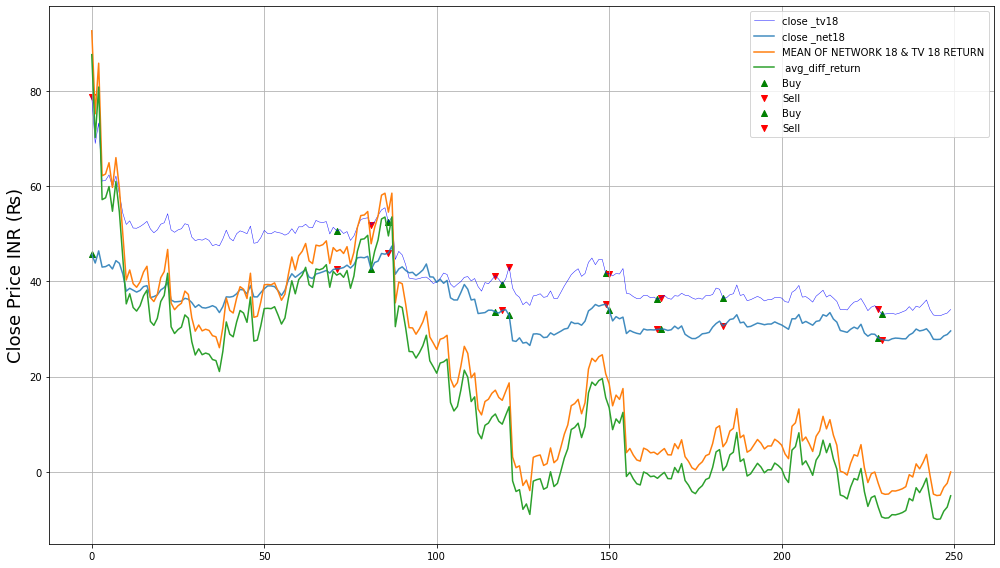

In [59]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(joint['close _net18'] , label = 'close _tv18' ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(joint['close _tv18'], label = 'close _net18', alpha = 0.85)
ax.scatter(np.arange(len(buy_1)) , buy_1 , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(np.arange(len(sell_1)) , sell_1 , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.scatter(np.arange(len(buy_2)) , buy_2 , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(np.arange(len(sell_2)) , sell_2 , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.plot(joint['avg_net18_tv18'], label = 'MEAN OF NETWORK 18 & TV 18 RETURN')
ax.plot(joint['avg_net18_tv18']-5, label = ' avg_diff_return')
#ax.set_title(stocksymbols[0] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
#ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()